# Exploratory Data Analysis

In [1]:
# import Libraries

import pandas as pd
import numpy as np
import plotly.express as px
import missingno as msno

In [11]:
# Read the csv into df

df = pd.read_csv('data/house_sales.csv', delimiter=',')
df.describe()
#higher view the better


,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,...,21597.000000,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,4.580474e+09,10799.000000,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,...,7.657915,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512
std,3.673681e+05,2.876736e+09,6234.661218,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,...,1.173200,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000102e+06,1.000000,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,2.123049e+09,5400.000000,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.904930e+09,10799.000000,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,7.308900e+09,16198.000000,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,9.900000e+09,21597.000000,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,...,13.000000,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Get an Overview

#df.info()
df["view"].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [4]:
# Start Cleaning and Rename df

housing = df.drop(columns='id.1')
housing.rename(columns={"id":"sales_id"}, inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   sales_id       21597 non-null  int64  
 4   bedrooms       21597 non-null  float64
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  float64
 7   sqft_lot       21597 non-null  float64
 8   floors         21597 non-null  float64
 9   waterfront     19206 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  float64
 14  sqft_basement  21145 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17749 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

<Axes: >

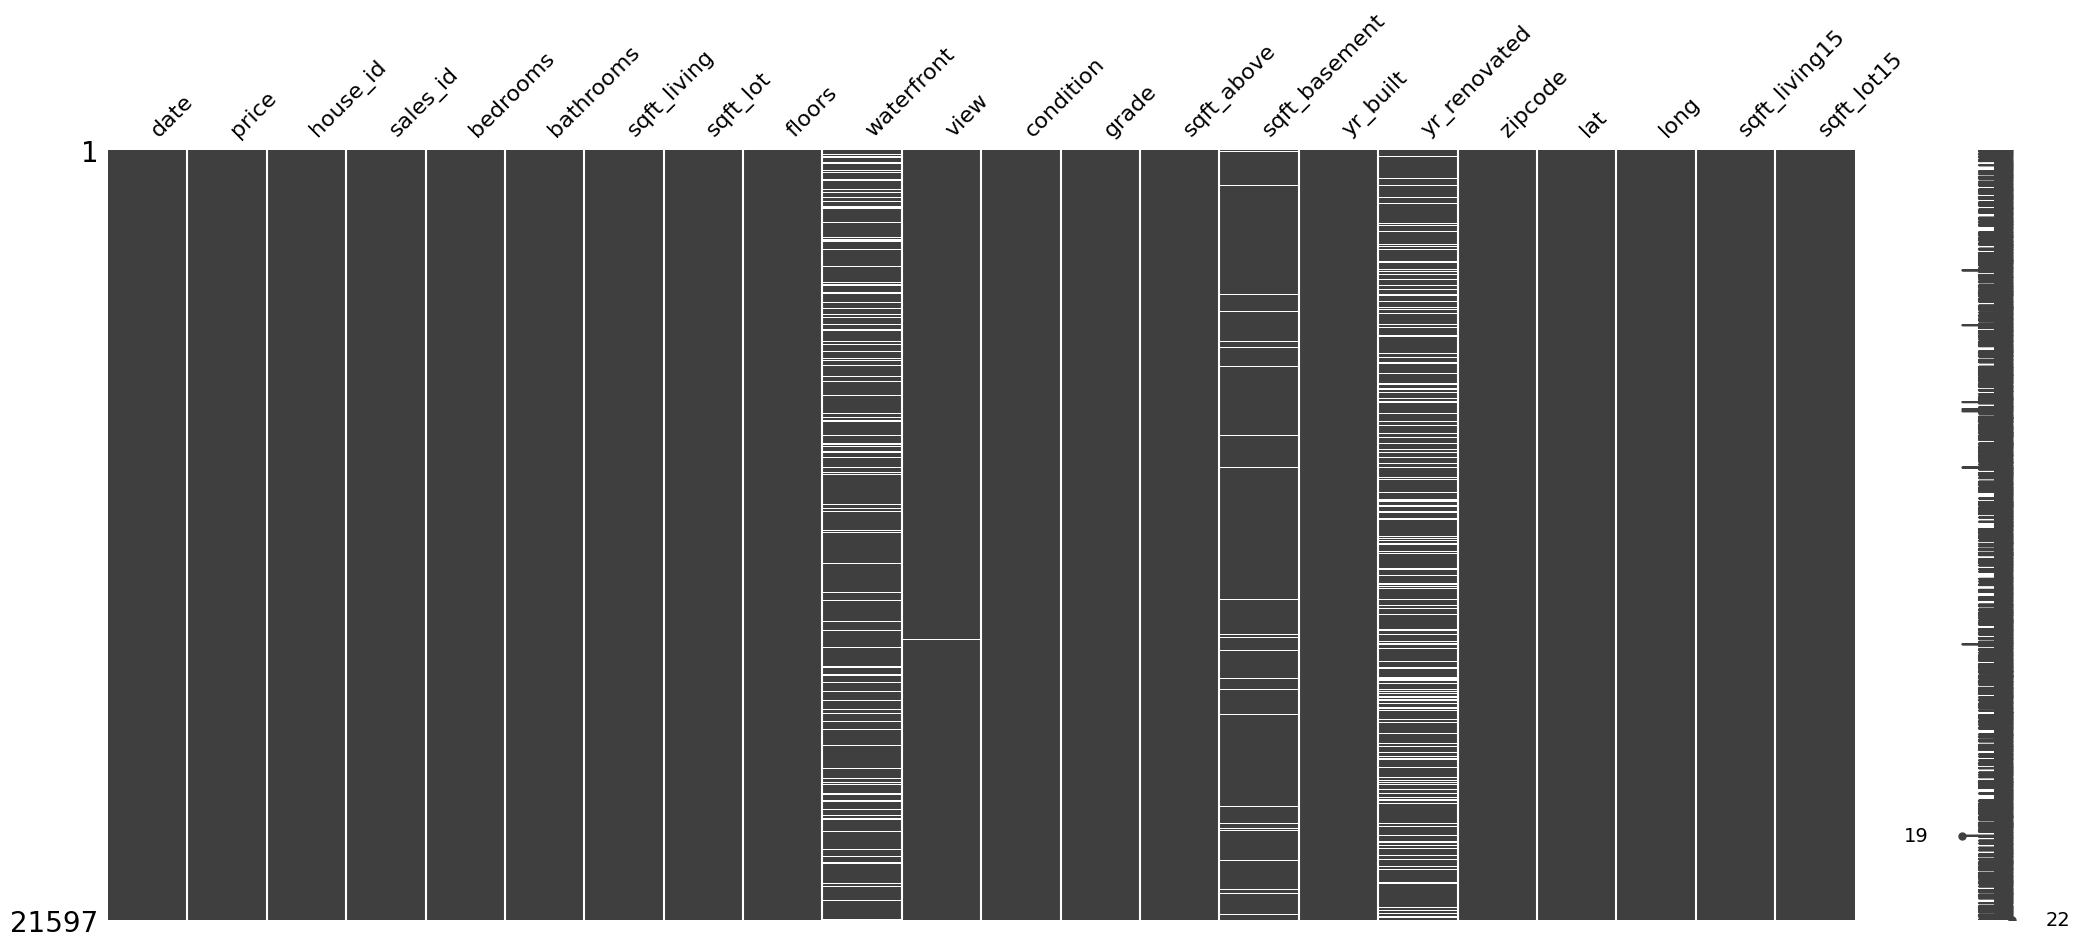

In [5]:
# Exploring Missing Data in Missingno
msno.matrix(housing)

In [10]:
# Plot interesting data
import plotly.graph_objects as go
from plotly.subplots import make_subplots

y = housing["price"]

fig = make_subplots(
    rows = 2, cols = 2, 
    subplot_titles=("View", "Quality", "Living Space", "Condition"))

fig.add_trace(go.Scatter(x=housing["view"], y=y),
              row=1, col=1)
fig.add_trace(go.Scatter(x=housing["grade"], y=y),
              row=1, col=2)
fig.add_trace(go.Scatter(x=housing["sqft_living"], y=y),
              row=2, col=1)
fig.add_trace(go.Scatter(x=housing["condition"], y=y),
              row=2, col=2)
fig.update_layout(height=600, width=800, title_text="Price Drivers")
fig.show()

In [14]:
#Plot Geographical Data

# df_geo = px.data.gapminder().query("year == 2007")
# fig = px.scatter_geo(df_geo, locations="iso_alpha",
#                      size="pop", # size of markers, "pop" is one of the columns of gapminder
#                      )
import geopandas as gpd

px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_geo(housing,
                     lat = housing["lat"],
                     lon = housing["long"],
                     hover_name="price")

fig.show()

ModuleNotFoundError: No module named 'geopandas'